# Lab assignments

## Part One

In this part, you make use of the job survey data from the book: Quantitative data analysis with SPSS.

* ethnicgp = ethnic group, 1 = White, 2 = Asian, 3 = West Indian, 4 = African, 5 = other
* gender (male =1, female =2),
* income = gross annual income before tax in 1000£
* age in years
* years = number of years working at this firm
* commit = organisational commitment (scale 1 ~ 5)
* satis = job satisfaction
* autonom = job autonomy
* routine = job routine
* attend = attendance at meeting (yes = 1, no = 2)
* skill = rated skill (unskilled, semi-skilled, fairly skilled, highly skilled, 1 ~ 4)
* prody = rated productivity (very poor, poor, average, good, very good, 1 ~ 5)
* qual = rated quality (very poor, poor, average, good, very good, 1 ~ 5)
* absence = days of being absent in last 12 months

In [8]:
#import libraries and dataset and check if loaded correctly
from statstoolkit.statistics import *
from statstoolkit.probability import *
from statstoolkit.visualization import *
from statstoolkit.utils import *
import pandas as pd

df = pd.read_excel('Data_source.xlsx')
df.head()

,Id,ethnicgp,gender,age,years,commit,satis,autonom,routine,attend,skill,prody,qual,absence,income
0,1,1,1,29.0,1.0,4.0,NaN,10,9,2,3,NaN,1,7.0,16.6
1,2,2,1,26.0,5.0,2.0,NaN,7,15,1,3,4.0,4,8.0,14.6
2,3,3,1,40.0,5.0,4.0,15.0,7,8,1,4,3.0,4,0.0,17.8
3,4,3,1,46.0,15.0,2.0,7.0,7,10,2,3,3.0,4,4.0,16.4
4,5,2,2,63.0,36.0,4.0,14.0,11,18,1,3,5.0,3,0.0,18.6


### Exercise 1.1

#### a) Make plot of gender in Bar chart and ethnic group in pie diagram.

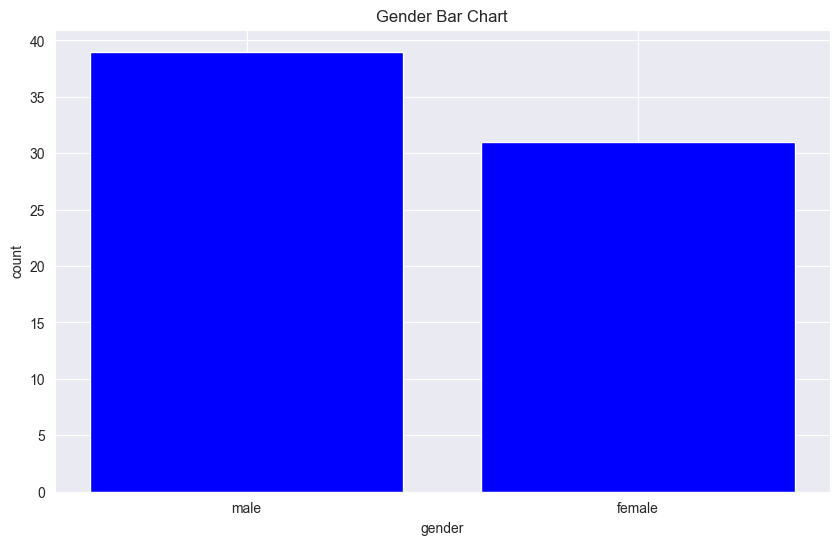

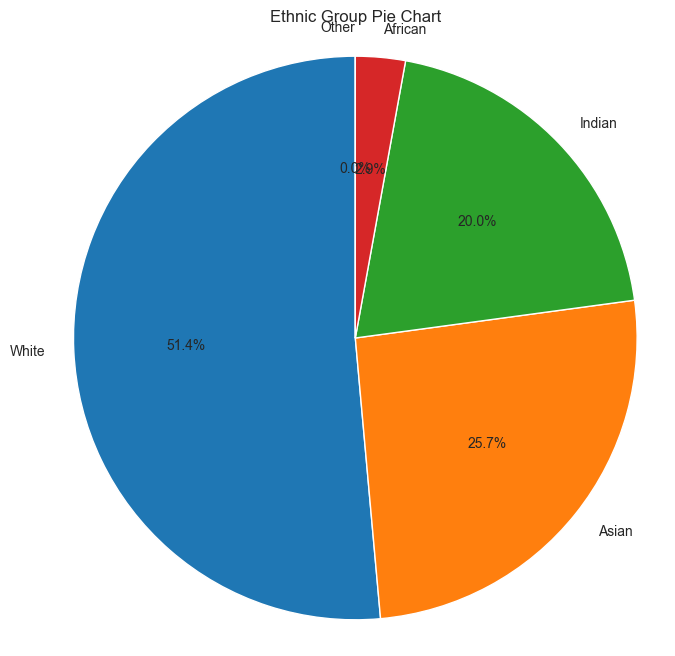

In [15]:
#Count the number of males and females in the gender feature
nr_males = np.count_nonzero(df['gender']==1)
nr_females = np.count_nonzero(df['gender']==2)

#Plot the gender bar chart using statstoolkit
bar(['male','female'], [nr_males, nr_females], title='Gender Bar Chart', xlabel='gender', ylabel='count', color='blue')

etn_white = np.count_nonzero(df['ethnicgp']==1)
etn_asian = np.count_nonzero(df['ethnicgp']==2)
etn_indian = np.count_nonzero(df['ethnicgp']==3)
etn_african = np.count_nonzero(df['ethnicgp']==4)
etn_other = np.count_nonzero(df['ethnicgp']==5)

pie([etn_white,etn_asian,etn_indian,etn_african,etn_other],['White','Asian','Indian','African','Other'],title='Ethnic Group Pie Chart')

#### b) Make a five number summary (max, min, median, the first and third quartiles) of Age then a box-plot

Age - Five number summary
Maximum:  63.0
Minimum:  18.0
Median:  39.5
First Quartile:  29.0
Third Quartile:  50.75


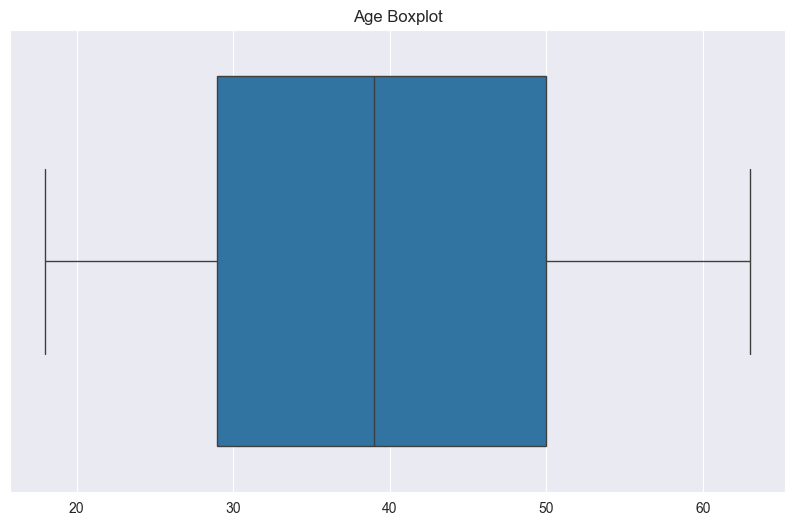

In [20]:
print('Age - Five number summary')
print('Maximum: ', np.max(df['age']))
print('Minimum: ', np.min(df['age']))
print('Median: ', median(df['age']))
print('First Quartile: ', quantile(df['age'],0.25))
print('Third Quartile: ', quantile(df['age'],0.75))

boxplot(df['age'],title='Age Boxplot')

#### c) Find the mean and standard deviation of income, and as well as histogram of it.

Income Mean:  15.63823529411765
Income Standard Deviation:  1.9811634588087454


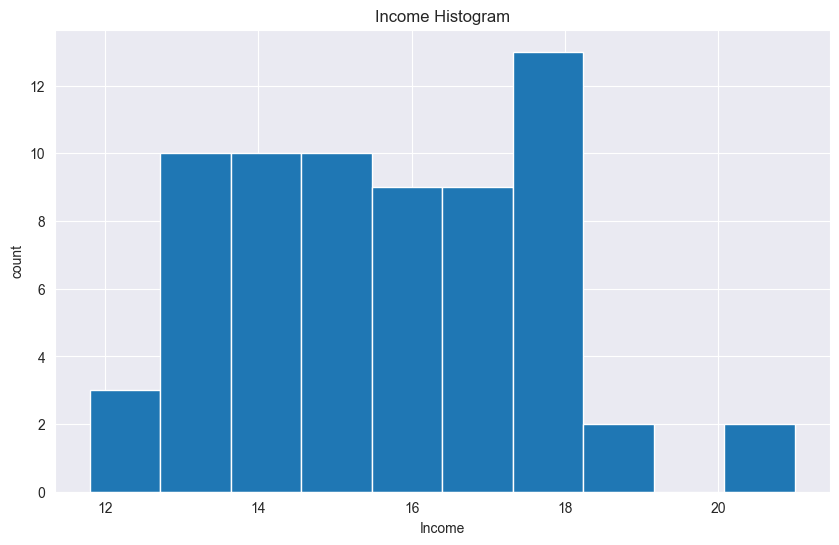

In [50]:
print('Income Mean: ', np.mean(df['income']))

print('Income Standard Deviation: ', np.std(df['income']))

hist(df['income'],title='Income Histogram', xlabel='Income', ylabel='count')

### Exercise 1.2 Consider the variables income and absence.

#### a) Make scatter plot to visualize the relationship between them

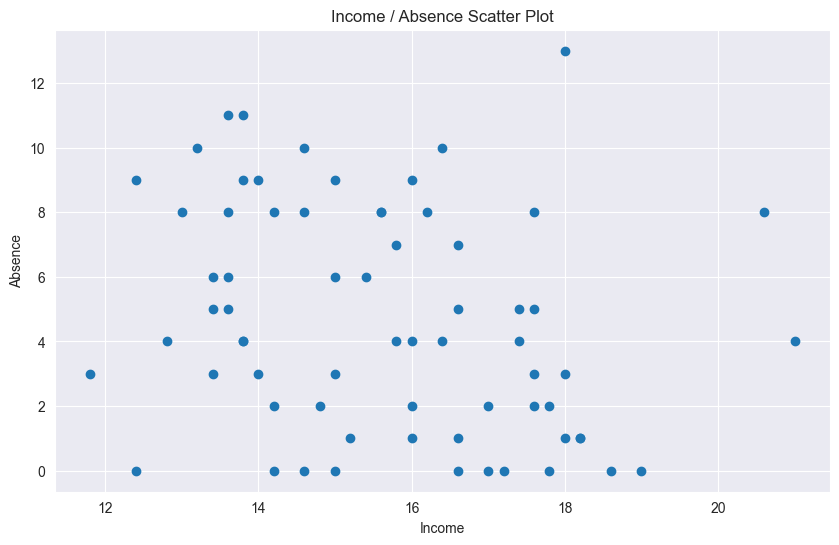

In [47]:
scatter_2d(df['income'],df['absence'],title='Income / Absence Scatter Plot', xlabel='Income', ylabel='Absence')

#### b) Find the simple regression model where income is dependent variable and absence is independent variable. What is your determination coefficient?

In [73]:
# For splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
# Metric for evaluation
from sklearn.metrics import r2_score

import statsmodels.api as sm
# Remove rows with missing values
df_clean = df[['absence', 'income']].dropna()
X = df_clean['absence']
y = df_clean['income']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = .3, # 30% of data for testing
                                                   shuffle = True, # Shuffling values
                                                   random_state = 42)

# Adding a Constant term for the Intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fitting model
model = sm.OLS(y_train, X_train).fit()
print(model.summary(alpha = 0.05))
y_pred = model.predict(X_test) # Running predictions

r2_score = r2_score(y_test, y_pred) # Computing R_squared

print('Determination coefficent:', r2_score)

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     2.176
Date:                Sun, 26 Oct 2025   Prob (F-statistic):              0.147
Time:                        12:12:12   Log-Likelihood:                -90.731
No. Observations:                  46   AIC:                             185.5
Df Residuals:                      44   BIC:                             189.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.4453      0.441     37.265      0.0

### Exercise 1.3 Study the multiple regression model with satis as dependent variable and commit, autonom, income, skill, rated quality, age, years as independent variables.

In [78]:
#Cleaning the data by droping missing values ethnicgp	gender	age	years	commit	satis	autonom	routine	attend	skill	prody	qual	absence	income
df_clean = df[['commit','autonom','income','skill','qual','age','years','satis']].dropna()

X = df_clean[['commit','autonom','income','skill','qual','age','years']]
y = df_clean['satis']

# Creating training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = .3, # 30% of data for testing
                                                   shuffle = True, # Shuffling values
                                                   random_state = 42)

# Adding a Constant term for the Intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fitting model
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  satis   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     21.85
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           5.07e-11
Time:                        12:22:01   Log-Likelihood:                -77.001
No. Observations:                  43   AIC:                             170.0
Df Residuals:                      35   BIC:                             184.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6752      2.700     -1.732      0.092     -10.156       0.806
commit         1.0034      0.290      3.466      0.001       0.416       1.591
autonom        0.4203      0.118      3.566      0.001       0.181       0.660
income         0.5637      0.241      2.334      0.025       0.073       1.054
skill          0.3460      0.271      1.275      0.211      -0.205       0.897
qual           0.2069      0.222      0.933      0.357      -0.243       0.657
age           -0.0477      0.055     -0.875      0.388      -0.158       0.063
years          0.0280      0.047      0.601      0.552      -0.067       0.123
==============================================================================
Omnibus:                        0.750   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.687   Jarque-Bera (JB):                0.298
Skew:                          -0.193   Prob(JB):                        0.861
Kurtosis:                       3.131   Cond. No.                         543.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### a) Which variables among them do NOT have any significant impact on satis ?

In [79]:
model.pvalues

const      0.092127
commit     0.001417
autonom    0.001072
income     0.025449
skill      0.210597
qual       0.357083
age        0.387695
years      0.551972
dtype: float64

#### b) Find a simpler multiple regression model with satis as dependent variable by deleting all those non-impact variables.


In [80]:
#Cleaning the data by droping missing values ethnicgp	gender	age	years	commit	satis	autonom	routine	attend	skill	prody	qual	absence	income
df_clean = df[['commit','autonom','income','skill','qual','age','years','satis']].dropna()

X = df_clean[['commit','autonom','income']]
y = df_clean['satis']

# Creating training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = .3, # 30% of data for testing
                                                   shuffle = True, # Shuffling values
                                                   random_state = 42)

# Fitting model
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  satis   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              708.6
Date:                Sun, 26 Oct 2025   Prob (F-statistic):                    1.09e-34
Time:                        12:23:24   Log-Likelihood:                         -80.553
No. Observations:                  43   AIC:                                      167.1
Df Residuals:                      40   BIC:                                      172.4
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
commit         1.2720      0.250      5.098      0.000       0.768       1.776
autonom        0.4030      0.108      3.732      0.001       0.185       0.621
income         0.2350      0.060      3.915      0.000       0.114       0.356
==============================================================================
Omnibus:                        0.980   Durbin-Watson:                   2.143
Prob(Omnibus):                  0.613   Jarque-Bera (JB):                0.564
Skew:                          -0.279   Prob(JB):                        0.754
Kurtosis:                       3.057   Cond. No.                         19.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Exercise 1.4 Find confidence interval of job satisfaction and also confidence interval of difference in job satisfaction between men and women.

### Exercise 1.5 Using the Mann-Whitney-Wilcoxon test to see if there is any significance in skill between man and woman, and compare the result with confidence interval for the difference.

### Exercise 1.6 Using the Kruskal-Wallis test to see if there is any significance in absence among ethnic group, and compare the result with One-Way ANOVA analysis.

### Exercise 1.7 Re-code the variable “income” into “income_class “ with proper choice of limits of class classification (suggestion: low income class [Min, Q1], middle income class (Q1, Q3], high income class (Q3, Max]) thereafter investigate if there is any significant relationship between income_class and skill.